#Adult Census Income Prediction



In this notebook, I seek to predict the income of people based on multiple socio-economic factors, using the Adult Income Census dataset. I will plot several of these factors against income in order to visualize trends and patterns. Finally, I will be using 5 machine learning models in attempts to accurately predict if a person earns a yearly income greater than or less than $50K.


#Machine Learning Models
XGBclassifier
Random Forest Classifier
Linear Discriminat Analysis
Decision Tree Classifier
Logistic Regression

1. Preparing Libraries & Data
2. Cleaning Data
3. Visualization
4. Modeling
5. Model Tuning
6. Outcome

1. Preparing Libraries & Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_context("poster")

dataset = pd.read_csv("adult1.csv")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("Setup Complete")

Setup Complete


In [ ]:
dataset.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
dataset.isnull().sum()
#checking for missing values

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
#Object in the case = Text
#Int64 = Numbers
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Text(0.5, 0, 'Workclass')

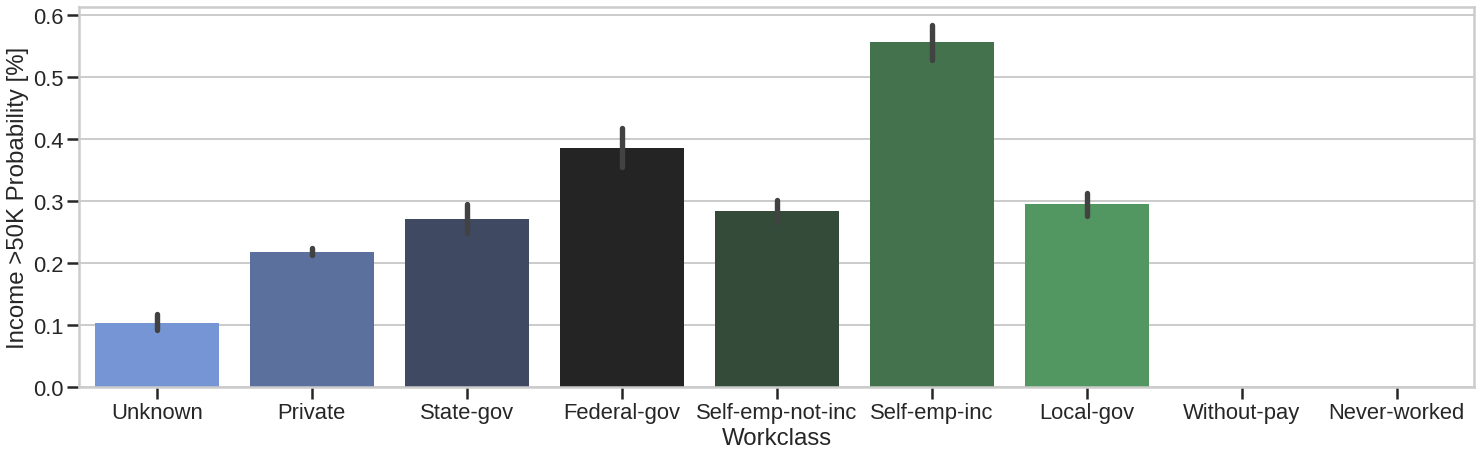

In [ ]:
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})
dataset["workclass"] = dataset["workclass"].replace(["?"],'Unknown')
fig, ax = plt.subplots(figsize=(25,7))
sns.set_context("poster")
current_palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark")

fig = sns.barplot(x='workclass',y='income',data=dataset,palette=current_palette)

fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Workclass")

From the barplot of Workclass vs Income we see from high to low that self-emp-inc has the highest chance of making over 50k with a 54% chance, while the last known workclass(private) has a 22% of making over 50k.

Self-emp-inc : 54%
Federal-gov : 38%
Local-gov : 29%
Self-emp-not-inc : 28%
State-gov : 26%
Private : 22%
Unknown : 11%

#Barplot of Marital Status vs Income

Text(0.5, 0, 'Marital Status')

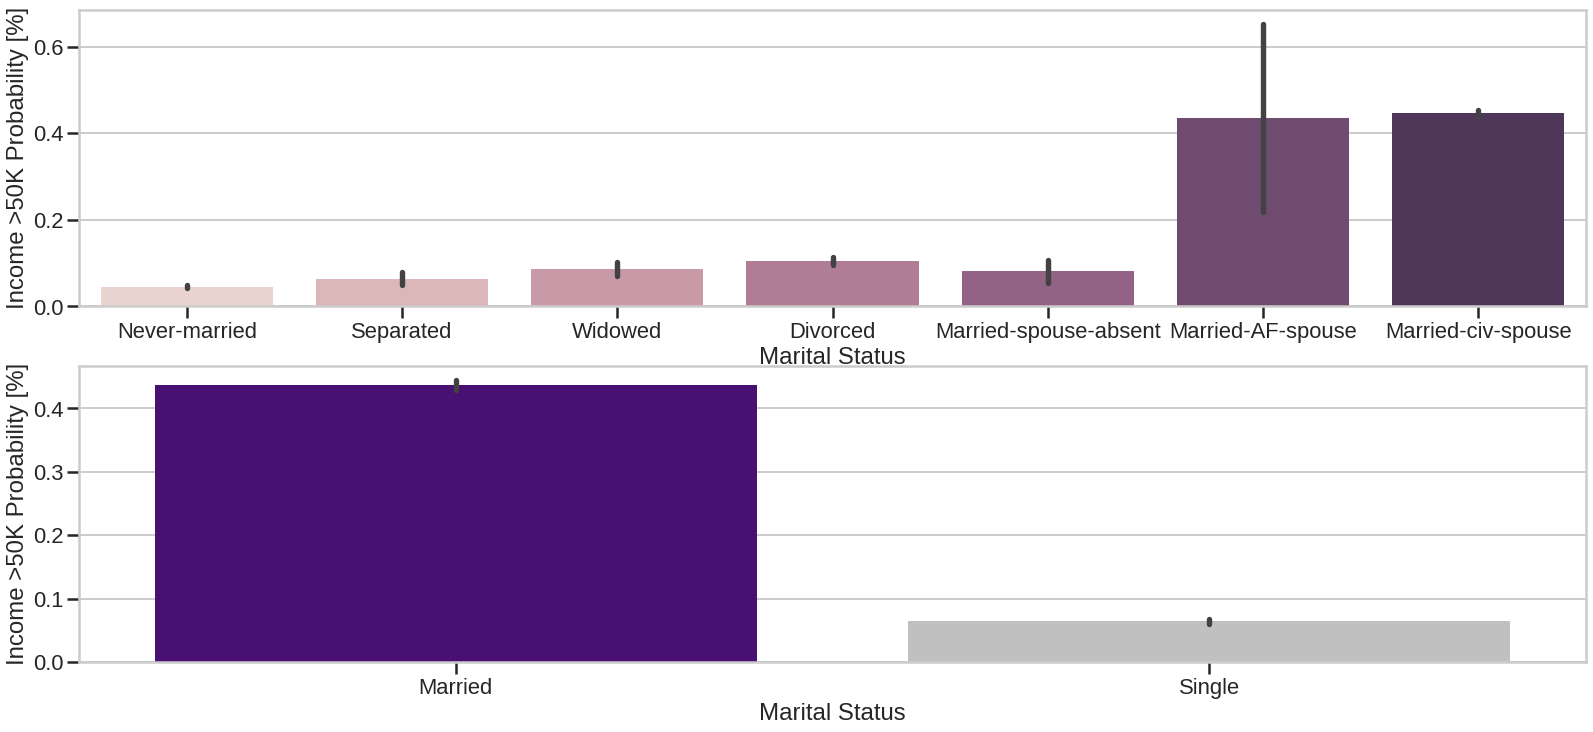

In [ ]:
fig, axe = plt.subplots(2,1,figsize=(27,12))
current_palette =sns.cubehelix_palette(8)
plt.style.use('seaborn-whitegrid')
fig = sns.barplot(x='marital.status',y='income',data=dataset,ax=axe[0],order =['Never-married','Separated','Widowed','Divorced','Married-spouse-absent','Married-AF-spouse','Married-civ-spouse'],palette=current_palette)

fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Marital Status")


datasetCopy= dataset.copy()
datasetCopy["marital.status"] = datasetCopy["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], '1')
datasetCopy["marital.status"] = datasetCopy["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], '0')
datasetCopy["marital.status"] = datasetCopy["marital.status"].astype(int)

sns.set_context("poster")
fig = sns.barplot(x='marital.status',y='income',data=datasetCopy,ax=axe[1], order=[1,0],palette=['indigo','silver'])

fig.set(xticklabels =['Married','Single'])
fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Marital Status")


From the first barplot of Marital Status vs Income, we see that, from high to low, Married-civ-spouse has the highest probability of earning an income of over 50k with a 43% chance, while Never-married has the lowest, with a 5% chance of earning over 50k.

Married-civilian-spouse : 45%
Married-Armed Forces-spouse : 42%
Divorced : 10%
Widowed : 8%
Married-spouse-absent : 7%
Separated : 6%
Never-married : 5%
From the second barplot ofMarital Status vs Income plot, we can see a wide discrepancy in probability of earning a higher income based on marital status. Married adults on average have a 45% probability of earning over 50k , while single adults possess only a 7% probability of earning over 50k.

Married : 45%
Single : 7%

#Barplot of Relationship vs Income#

Text(0.5, 0, 'Relationship')

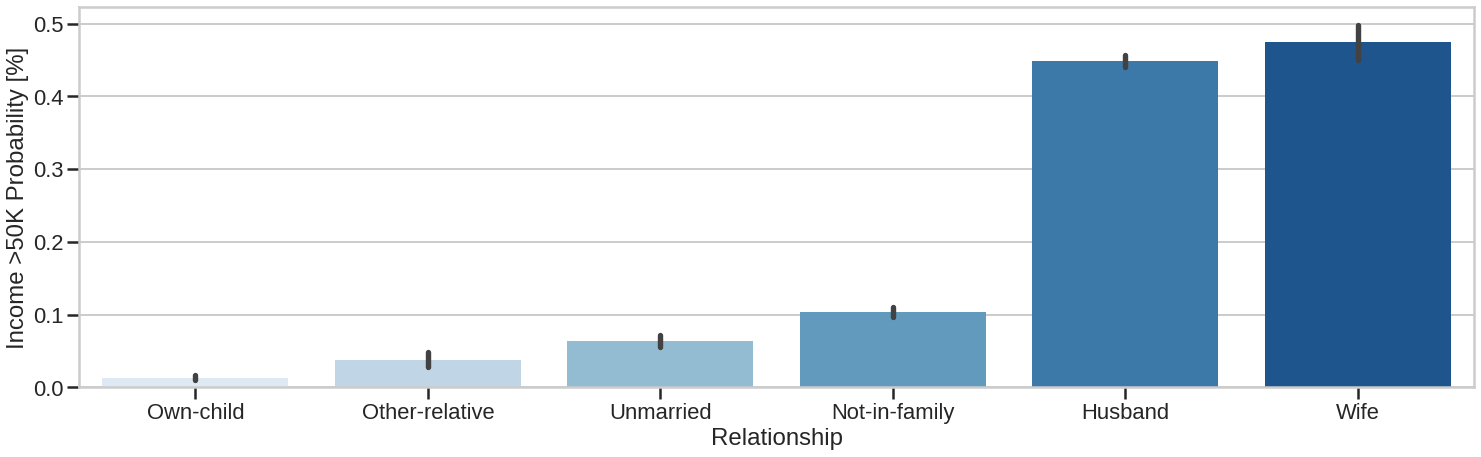

In [ ]:
fig, ax = plt.subplots(figsize=(25,7))
sns.set_context("poster")
current_palette = sns.color_palette("Blues")

fig = sns.barplot(x='relationship',y='income',data=dataset, order=['Own-child','Other-relative','Unmarried','Not-in-family','Husband','Wife'], palette=current_palette)

fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Relationship")

From the barplot of Relationship vs Income, we see that, from high to low, Wife has the highest probability of earning an income of over 50k with a 47% chance, while Own-child has the lowest, with a 1% chance of earning over 50k.

Wife : 47%
Husband : 44%
Not-in-family : 11%
Unmarried : 5%
Other-relative : 3%
Own-child : 1%
This plot clearly shows that wives and husbands consecutively have the highest probabilities of earning incomes over 50k. This data agrees with the outcome of the previous barplot of Marital Status vs Income, which is that, in general, married people are more likely to earn higher incomes of over 50k, while single people are significantly less likely to make over 50k.

#Correlation Matrix for Numeric Data

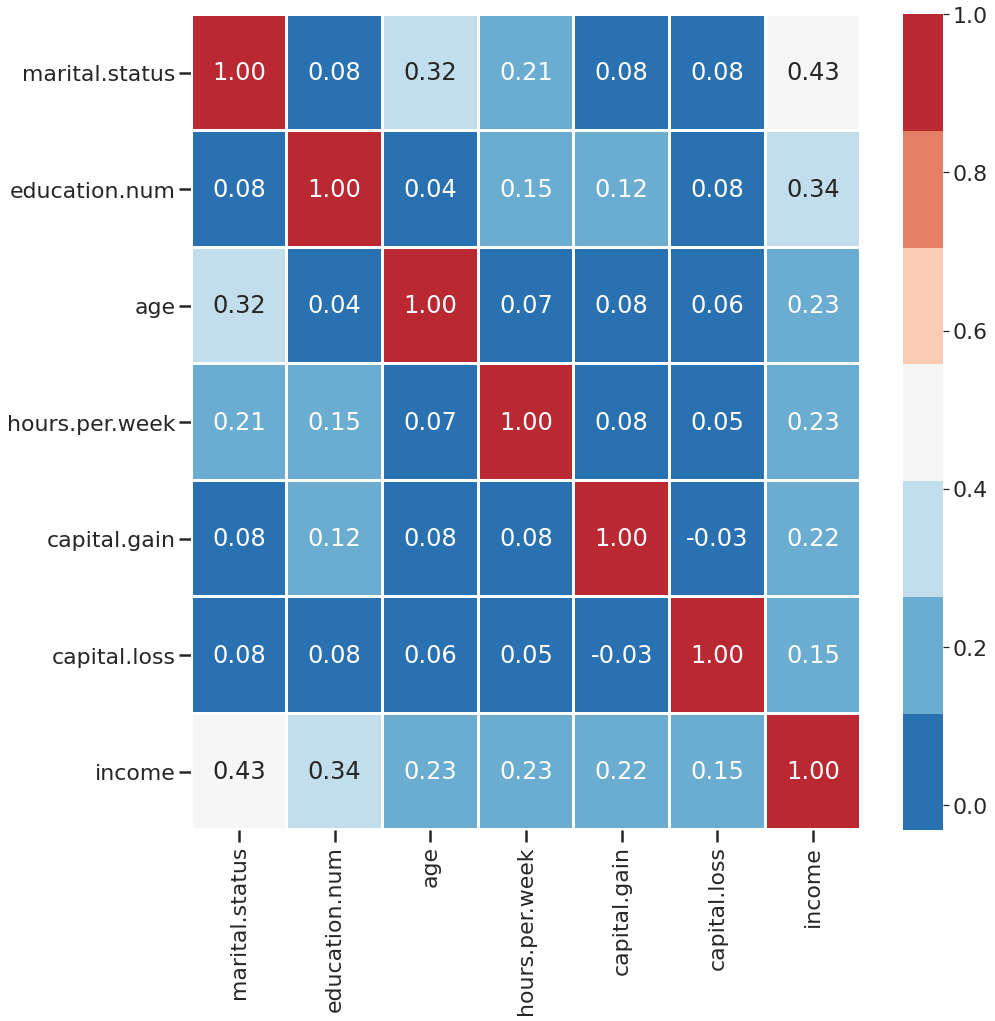

In [ ]:
numeric_columns = ['marital.status','education.num','age','hours.per.week','capital.gain','capital.loss','income']

fig, axe = plt.subplots(figsize=(15,15))
sns.set_context("poster")
sns.set(font_scale=2)
map1 = sns.color_palette("RdBu_r", 7)
sns.heatmap(datasetCopy[numeric_columns].corr(),annot=True, fmt='.2f',linewidths=2,cmap = map1)

The heatmap indicates that the most reliably predictors of earning an income over 50k are:

Marital Status : 43%
Years of Continuous Education : 34%
Age : 23%
Hours Per Week : 23%
This furthermore confirms the previously plotted data that marital status is indeed an crucial factor in determining adults' likelihood of earning a high income.

Violinplot of Age vs Income vs Sex

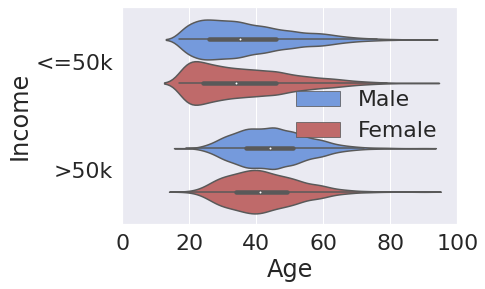

In [ ]:

g=sns.violinplot(x='age',y='income',hue='sex',hue_order=["Male","Female"],data=dataset,orient="h",palette=["cornflowerblue","indianred",])

g.set_ylabel("Income")
g.set_xlabel("Age")
g.set(yticklabels =['<=50k','>50k'])
setThis = g.legend(loc='center right')
plt.xlim(0,100)
axe.xaxis.set_major_locator(ticker.MultipleLocator(5))

The Violinplot of Age vs Income vs Sex shows a strong correlation between age and income, and a loose correlation between sex and income. This indicates that younger people, regardless of the gender, consistently earn less than their older counterparts. Thus, we can deduce that a person's age has a greater impact on income earned than their gender.

#Violinplot of Age vs Marital Status vs Income

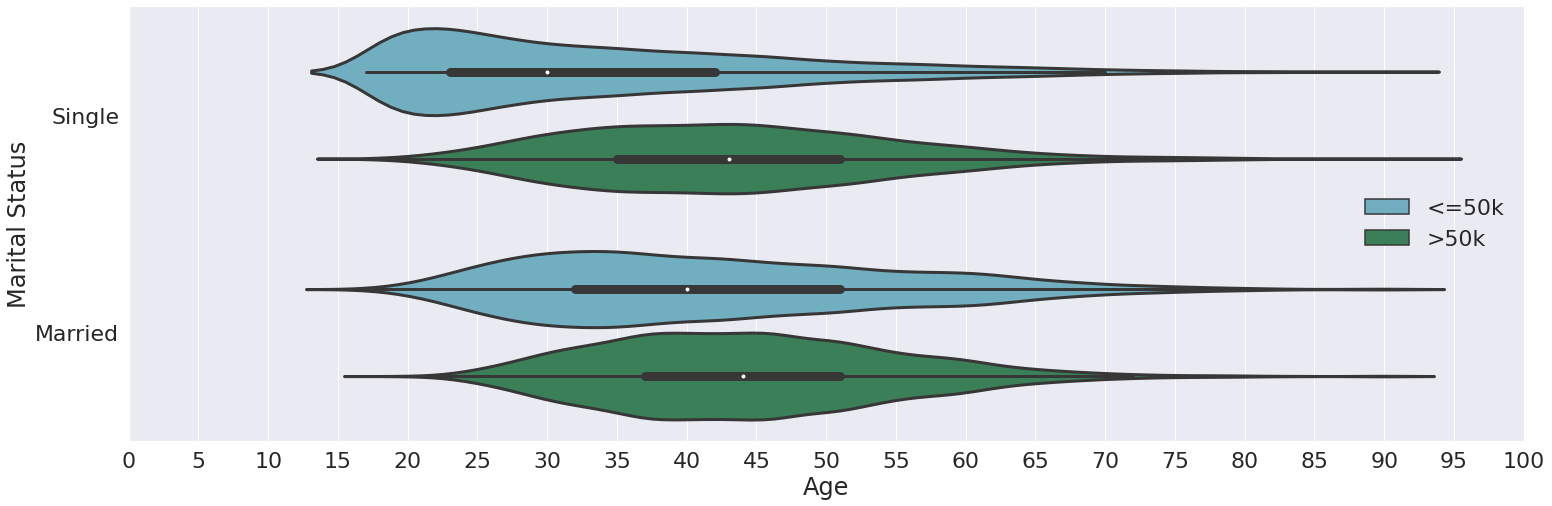

In [ ]:
dataset = pd.read_csv("adult1.csv")
fig, axe = plt.subplots(figsize=(25,8))
sns.set_context("poster")

g=sns.violinplot(x='age',y='marital.status',hue='income',data=datasetCopy,orient="h",palette=["c",'seagreen'])

g.set_ylabel("Marital Status")
g.set_xlabel("Age")
setThis = g.legend(loc='center right')
setThis.get_texts()[0].set_text("<=50k")
setThis.get_texts()[1].set_text(">50k")
g.set(yticklabels =['Single','Married'])
plt.xlim(0,100)
axe.xaxis.set_major_locator(ticker.MultipleLocator(5))

The Violin-plot of Age vs Marital Status vs Income shows that people who are younger and single are more likely to make less than 50k, while people who are older and single have a much higher probability of making over 50k.

People who are younger and married have a slightly higher probability to earn over 50k compared to their single counterparts. Those who are older and married have the highest probability to make over 50k as we can see from the width of the violin plot.

#Violinplot/Lineplot Education year vs Age vs Income

In [ ]:
fig, axe = plt.subplots(figsize=(31,9))
sns.set_context("poster")

g=sns.violinplot(x="education.num",y='age',hue='income',data=dataset,palette=["skyblue",'mediumseagreen'],ax = axe)
sns.lineplot(x="education.num",y='age',hue='income',data=dataset,palette=["c",'green'],ax=axe)


plt.ylim(0,100)
g.set_xlabel("Years of Continuous Education")
g.set_ylabel("Age")
setThis = g.legend(bbox_to_anchor=(.906, 1),loc=2)
setThis.get_texts()[0].set_text("Income")
axe.yaxis.set_major_locator(ticker.MultipleLocator(10))

This violin plot graphs Education year vs Age vs Income It indicates that adults who are older have greater probabilities of earning over 50k, even when compared to younger adults with higher levels of education. However, higher education levels still yield higher probabilities of higher income for younger adults.

The line plot was overlaid to help visualize the overall trend. We can see that the median of older adults (indicated by the white dots within each violin) remains higher than the median of younger adults all throughout the different levels of education. This data can be further contextualized when viewed in conjunction with the heatmap data, which showed that marital status, age, as well as years of continuous education (which positively correlate with one's age) are key factors in determining one's income.

#lmplot Age vs Hours-per-week vs Income

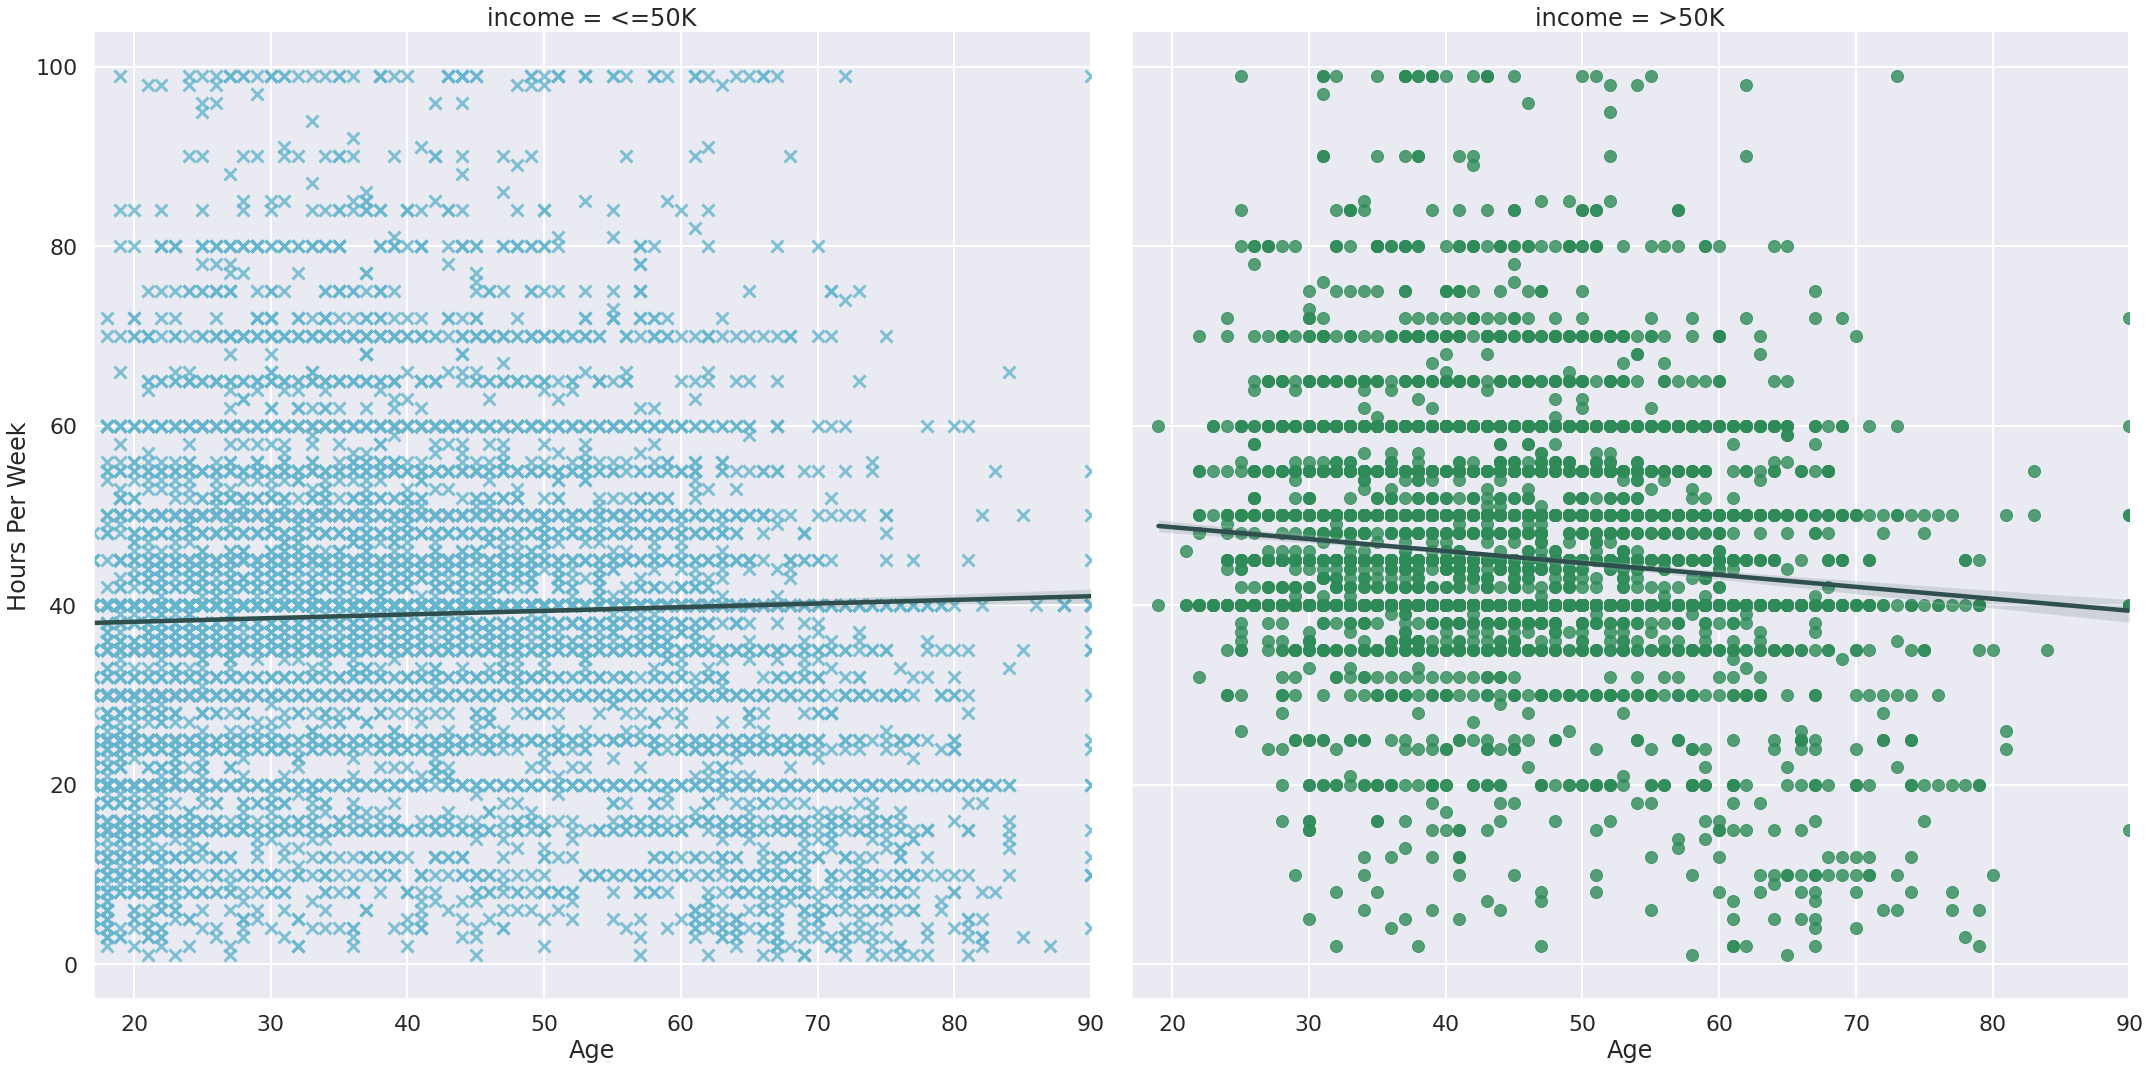

In [ ]:
dataset = pd.read_csv("adult1.csv")
sns.set_context("poster")
g=sns.lmplot(x="age",y='hours.per.week',hue='income',col="income",data=dataset,markers= ['x','o'],palette=["c",'seagreen'],height=15,line_kws={'color': 'darkslategray'})

g= (g.set_axis_labels("Age","Hours Per Week"))

This linear regression plots show the correlation between age and length of work weeks among adults who earn under and over 50k, respectively. On average, adults who earn under 50k have a tendency to work more hours as they age, however many people remain working approximately 30-45 hour weeks, and a substantial fraction of much older adults drastically decrease the length of their work weeks. Adults who earn over 50k tend to decrease their working hours as they age (with a decrease rate larger than the increase rate of the work weeks of adults earning less than 50k). Many adults earning over 50k continue to work 30-60 hour work weeks until they become much older.

#4. Modeling

In [ ]:
#Before we can begin to model are dataset, we first have to drop any categorical data and convert the one's we want to keep into binary:: Yes (1) or No (0)
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].map({"Married":0, "Single":1})
dataset["marital.status"] = dataset["marital.status"]
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})
dataset.drop(labels=["sex","workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)

dataset.head(5)

,age,fnlwgt,education.num,marital.status,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,1,0,4356,40,0
1,82,132870,9,1,0,4356,18,0
2,66,186061,10,1,0,4356,40,0
3,54,140359,4,1,0,3900,40,0
4,41,264663,10,1,0,3900,40,0


#Splitting Dataset into training and Test Sets

In [ ]:
numeric_columns = ['marital.status','age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
X=dataset[numeric_columns]
y=dataset.income
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4793  173]
 [1126  421]]


0.8005527406725012

#Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, max_features= 4, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Making the Confusion Matrix for Random Forest Classification Model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4583  383]
 [ 632  915]]


0.8441578381698143

Applying k-Fold Cross Validation for Random Forest Classification Model

In [ ]:
from sklearn.model_selection import cross_val_score
kfoldCV = StratifiedKFold(n_splits=5, random_state=0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = kfoldCV)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.68 %
Standard Deviation: 0.34 %


#Training the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Making the Confusion Matrix for Decision Tree Classification

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4338  628]
 [ 620  927]]


0.8083832335329342

Applying k-Fold Cross Validation for Decision Tree Classification

In [ ]:
from sklearn.model_selection import cross_val_score
kfoldCV = StratifiedKFold(n_splits=5, random_state=0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = kfoldCV)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.57 %
Standard Deviation: 0.44 %


#APPLYING LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

Training Logisttics Regression on LDA

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Making The Confusion Matrix for LDA



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4598  368]
 [ 761  786]]


0.826654383540611

Applying k-Fold Cross Validation for LDA

In [ ]:
from sklearn.model_selection import cross_val_score
kfoldCV = StratifiedKFold(n_splits=5, random_state=0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = kfoldCV)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.16 %
Standard Deviation: 0.52 %


#Training XGBoost on the Training set

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators=250)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Making the Confusion Matrix for XGBoost

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4583  383]
 [ 748  799]]


0.8263473053892215

Applying k-Fold Cross Validation for XGBoost

In [ ]:
kfoldCV = StratifiedKFold(n_splits=5, random_state=0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = kfoldCV)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.97 %
Standard Deviation: 0.38 %
